# Part I - Exploratory Data Analysis on Airline On-Time Performance Data
## by Ismaheel Bello
## Introduction
<p id='top'></p>

> The dataset consist of flight arrival and depature details for all commercial flights within the USA from 1987 - 2008.
The data used for this analysis was downloaded from <a href='https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7'>ASA Statistical Computing Dataverse.</a>


>The data consist of four tables,which are:
> <ul>
    <li>The flight details from 1987 - 2008 </li>
    <li> Plane Dataset</li>
    <li> Carriers Dataset</li>
    <li> Airport dataset </li>
</ul>

> This analysis will be focused on using Visualization to answer some research questions. Below are some of the research questions to be answered.

><ol>
    <li><b><a href='#Q1'>Which day of the week has the highest number of flights</a></b></li>
   <li><b><a href='#Q2'> Which Year has the highest number of flights</a></b></li>
    <li><b><a href='#Q3'>What is the main reason for cancelled flight.</a></b></li>
    <li><b><a href='#Q4'>Proportion of Cancelled Flights</a></b></li>
    <li><b><a href='#Q5'>Which month has the highest number of flights</a></b></li>
    <li><b><a href='#Q6'>Rate of diverted flights</a></b></li>
    <li><b><a href='#Q10'>NASDELAY Distribution</a></b></li>
    <li><b><a href='#Q11'>Is there any relationship between departure delay and arrival delay</a></b></li>
    <li><b><a href='#Q12'> Is there any relationship between departure delay and weather delay</a></b></li>
    <li><b><a href='#Q13'>Is there any relationship between LateAircraft delay and ArrivalDelay</a></b></li>
    <li><b><a href='#Q14'>Distribution of flight across engine type</a></b></li>
    <li><b><a href='#Q15'>Relationship between delays.</a></b></li>





</ol>


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
#importing pandas
import pandas as pd
#Importing numpy
import numpy as np
#importing matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sns
%matplotlib inline
#importing sqlite
import sqlite3
#importing warning
import warnings
#surpressing warning
warnings.simplefilter("ignore")

In [2]:
#Connecting to database using SQLITE
conn = sqlite3.connect('flight.db')
#Opening database connection
cursor = conn.cursor()

In [3]:
#Connecting SQL magic to Sqlite
%load_ext sql
%sql sqlite:///flight.db

<b> Printing the list of tables available in our database we have: </b>

In [4]:
%%sql
SELECT * FROM sqlite_master where type = 'table';

 * sqlite:///flight.db
Done.


type,name,tbl_name,rootpage,sql
table,master.feather,master.feather,2,"CREATE TABLE ""master.feather"" ( ""index"" BIGINT, ""Unnamed: 0"" FLOAT, ""Year"" SMALLINT, ""Month"" SMALLINT, ""DayofMonth"" SMALLINT, ""DayOfWeek"" SMALLINT, ""DepTime"" FLOAT, ""CRSDepTime"" SMALLINT, ""ArrTime"" FLOAT, ""CRSArrTime"" SMALLINT, ""UniqueCarrier"" TEXT, ""FlightNum"" SMALLINT, ""TailNum"" TEXT, ""ActualElapsedTime"" FLOAT, ""CRSElapsedTime"" FLOAT, ""AirTime"" FLOAT, ""ArrDelay"" FLOAT, ""DepDelay"" FLOAT, ""Origin"" TEXT, ""Dest"" TEXT, ""Distance"" FLOAT, ""TaxiIn"" FLOAT, ""TaxiOut"" FLOAT, ""Cancelled"" SMALLINT, ""CancellationCode"" TEXT, ""Diverted"" SMALLINT, ""CarrierDelay"" FLOAT, ""WeatherDelay"" FLOAT, ""NASDelay"" FLOAT, ""SecurityDelay"" FLOAT, ""LateAircraftDelay"" FLOAT)"
table,airports.feather,airports.feather,2717108,"CREATE TABLE ""airports.feather"" ( ""index"" BIGINT, iata TEXT, airport TEXT, city TEXT, state TEXT, country TEXT, lat FLOAT, long FLOAT)"
table,carriers.feather,carriers.feather,2717173,"CREATE TABLE ""carriers.feather"" ( ""index"" BIGINT, ""Code"" TEXT, ""Description"" TEXT)"
table,plane_data.feather,plane_data.feather,2717192,"CREATE TABLE ""plane_data.feather"" ( ""index"" BIGINT, tailnum TEXT, type TEXT, manufacturer TEXT, issue_date TEXT, model TEXT, status TEXT, aircraft_type TEXT, engine_type TEXT, year TEXT)"


In [5]:
%%sql
SELECT count(*) as flight_details from "master.feather"

 * sqlite:///flight.db
Done.


flight_details
118914458


In [6]:
%%sql
select count(*) as plane_data from "plane_data.feather"

 * sqlite:///flight.db
Done.


plane_data
5029


In [7]:
%%sql
select count(*) as carrier_data from "carriers.feather"

 * sqlite:///flight.db
Done.


carrier_data
1491


### What is the structure of your dataset?

> The dataset flight details contains 118914458(118million+) rows

> The plane details contains 5029 rows.

> The carrier data contains 1491 rows.

### What is/are the main feature(s) of interest in your dataset?

- To know the day of the week / Month of the year when people are more likely to travel by flight.

- To check for relationship between delays.

- To know if the distance determines the type of flight based of Engine type that will be used.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Columns like<code>DepDelay</code>,<code>NASDelay</code>,<code>ArrDelay</code>,<code>DAYOFWEEK</code>,<code>MONTHOFYEAR</code>,<code>YEAR</code>,<code>SecurityDelay</code>,<code>Carriers</code>,<code>Cancellation</code>,
<code>CancellationCode</code>,<code>WeatherDelay</code>,<code>LateAircraftDelay</code>, <code>TailNum</code> will be used from the <code>master.feather</code> data from the database.

> <code>engine_type</code> will be used from the <code>plane_data</code> data from the dataset.

## Univariate Exploration

<p id='Q1'></p>

<a href='#top'>GoToTop</a>
### Question

#### 1. Which day of the week has the highest number of flights

### Visualization

#### Getting the DAYOFWEEK column from master.feather dataset in the dataset and dividing each distinct day count by 1095, so as to get the average flight per day.

In [13]:
#Getting the dataframe
day_of_week = pd.read_sql('''SELECT DISTINCT(DAYOFWEEK) as Day,COUNT(DAYOFWEEK)/1095 AS Counts FROM "master.feather"
                            group by DAYOFWEEK''',conn)

In [14]:
#making a copy of the data
day_of_week_copy = day_of_week
#Converting the data to whole number.
day_of_week_copy = round(day_of_week_copy,0).astype(int)
#Adding column days to the dataframe.
day_of_week_copy['Days'] = day_of_week_copy.Day.map({1:'Sun',2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri',7:'Sat'})
#day_of_week_copy =day_of_week_copy.sort_values(by = 'Counts',ascending = False)
#Resetting the index.
day_of_week_copy = day_of_week_copy.reset_index().drop(columns = 'index')
#Printing the data.
day_of_week_copy


,Day,Counts,Days
0,1,15934,Sun
1,2,15880,Mon
2,3,15917,Tue
3,4,15891,Wed
4,5,15896,Thu
5,6,14014,Fri
6,7,15063,Sat


#### Now, creating a function for the barplot.

In [15]:
def Barplot1(data,x,y,title,color = sns.color_palette()[0],ylabel = ''
             ,xlabel = '',yscale = 'linear'):
    '''BARPLOT without Percentage'''
    plt.figure(figsize = [11.69,8.27])
    sns.barplot(data = data,x = x,y = y,color = color);
    for num in range(data.shape[0]):
        value = data[y][num]
        plt.text(num,value+350,value,ha = 'center',va ='center');
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale(yscale)
    plt.yticks([])
    plt.title(title,fontsize = 13);
    plt.show()


#### Using the function to plot, we have:

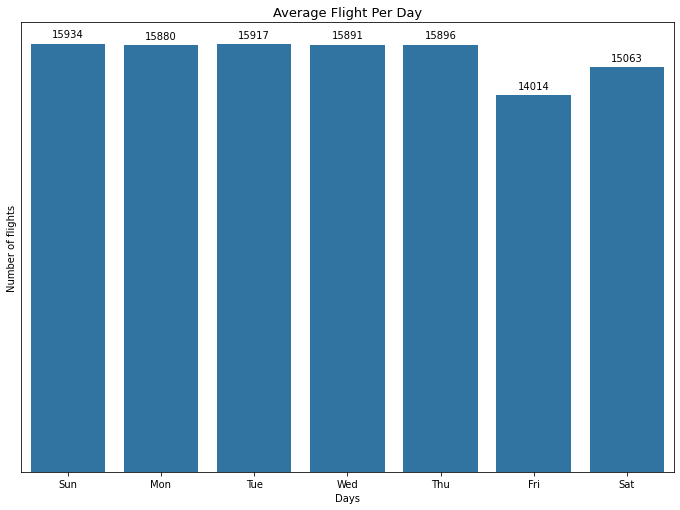

In [16]:
Barplot1(data = day_of_week_copy,x = 'Days',y = 'Counts',title = 'Average Flight Per Day',xlabel = 'Days',
         ylabel = 'Number of flights');

> Observations: From the result above we can see that there are more than 14000 flight on a daily basis.

<p id='Q2'></p>

<a href='#top'>GoToTop</a>

### Question

#### 2. Which Year has the highest number of flights

### Visualization

In [12]:
#Getting the data for the year.
year = pd.read_sql('''SELECT DISTINCT(YEAR), COUNT(YEAR) AS No_of_flights FROM "master.feather"
                        group by Year''',conn)

In [13]:
#making a copy of the data.
year_copy = year.copy()
#Printing the first five rows in the data.
year_copy.head()

,Year,No_of_flights
0,1987,1311826
1,1988,5202096
2,1989,5041200
3,1990,5270893
4,1991,5076925


In [14]:
#Converting the Year column that will be suitable for lineplot.
year_copy['Timestamp'] = pd.to_datetime(year_copy['Year'],format = '%Y')


In [15]:
#Setting Timestamp as Index
year_copy.set_index('Timestamp',inplace = True)

In [16]:
#Dropping the Year Column, since we've created a like of it.
year_copy.drop('Year',axis = 1,inplace = True)

In [17]:
#Printing the new data.
year_copy.head()

,No_of_flights
Timestamp,
1987-01-01,1311826
1988-01-01,5202096
1989-01-01,5041200
1990-01-01,5270893
1991-01-01,5076925


#### Creating a function for lineplot, so we have:

In [18]:
def Lineplot1(data,title,xlabel,ylabel):
    '''Function for LinePlot'''
    from matplotlib import rcParams
    rcParams['figure.figsize'] = 10,6
    #plt.figure(figsize = [10,6])
    '''LinePlot'''
    data.plot(kind = 'line',legend = False,marker = '*',color = 'blue')
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(rotation = 15);
    plt.yticks([2000000,3000000,4000000,5000000,6000000,7000000],['2M','3M','4M','5M','6M','7M']);
    plt.show()

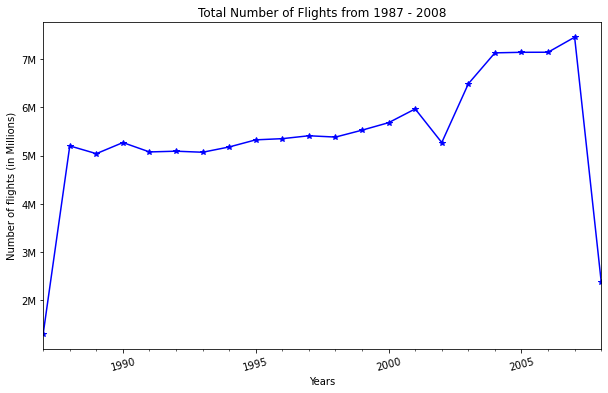

In [19]:
#Using the lineplot function to create our plot.
Lineplot1(year_copy,'Total Number of Flights from 1987 - 2008',
         'Years','Number of flights (in Millions)')

<p id='Q3'></p>

<a href='#top'>GoToTop</a>

### Question

#### 3. What is the main reason for cancelled flight.

### Visualization

In [9]:
#Selecting our distinct Cancellationcode and their count from the database.
cancelled_flight = pd.read_sql('''SELECT DISTINCT(CancellationCode),COUNT(CancellationCode) as Counts FROM "master.feather"
                where CancellationCode != "None"
                group by CancellationCode''',conn)

In [10]:
#Creating a copy of our dataset.
cancelled_flight_copy = cancelled_flight
#Printing the first 5 rows
cancelled_flight_copy.head()

,CancellationCode,Counts
0,A,289717
1,B,237894
2,C,133508
3,D,595


#### Creating function for barplot with Percentage:

In [11]:
#Creating function for the BarPlot
def Barplot2(data,x,y,title,color = sns.color_palette()[0],xlabel = '',ylabel = '',
             xticks_value = [],xticks_label = [],yticks_value = [],yticks_label = [],yscale = 'linear',
            bar_height = 7000):
    '''BARPLOT with Percentage'''
    plt.figure(figsize = [11.69,8.27])
    ax = sns.barplot(data = data,x = x,y = y,color = color);
    plt.xticks(xticks_value,xticks_label);
    for num in range(data.shape[0]):
        value = data[y][num]
        percent = '{:.2f}%'.format(100*value/data[y].sum())
        plt.text(num,value+bar_height,percent,ha = 'center',va ='center');
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale(yscale)
    plt.yticks(yticks_value,yticks_label)
    plt.title(title,fontsize = 13);
    plt.show()

#### Using the created function to visualize the data:

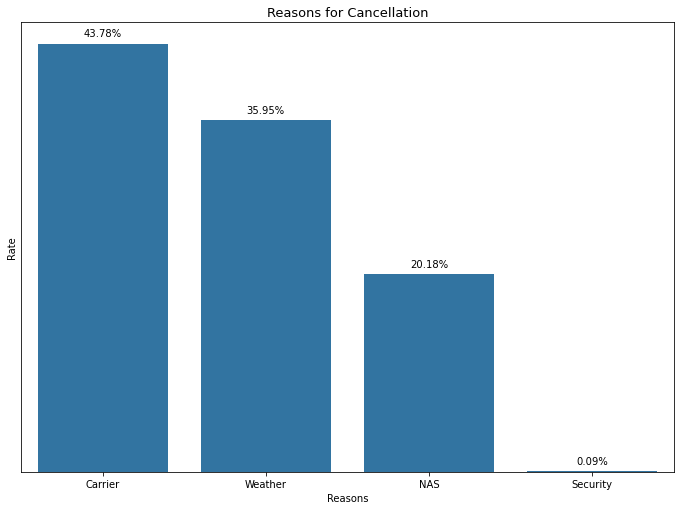

In [12]:
Barplot2(data = cancelled_flight_copy,x = 'CancellationCode',y = 'Counts',
        title = 'Reasons for Cancellation',xlabel = 'Reasons', ylabel = 'Rate',xticks_value = [0,1,2,3],
         xticks_label = ['Carrier','Weather','NAS','Security'])

> Observations: Most cancelled flight are caused by Carrier, and least caused for security.

<p id='Q4'></p>

<a href='#top'>GoToTop</a>

### Question

#### 4. Proportion of Cancelled Flights

### Visualization

#### We need to extract the cancelled columns from the database, so we can use it for analysis

In [5]:
cancelled = pd.read_sql('''SELECT DISTINCT(CANCELLED),COUNT(CANCELLED) as Counts FROM "master.feather"
                            group by cancelled''',conn)

In [6]:
#Printing the data
cancelled

,Cancelled,Counts
0,0,116684126
1,1,2230332


In [7]:
#Creating column to map 0 to No and 1 to Yes
cancelled.Cancelled = cancelled.Cancelled.map({0:'No',1:'Yes'})

#### Using our Barplot2() function visualize our data

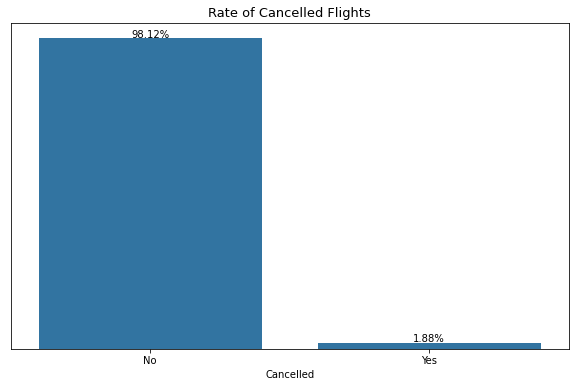

In [27]:
Barplot2(data = cancelled,x = 'Cancelled',y = 'Counts',title = 'Rate of Cancelled Flights',
         xlabel = 'Cancelled',ylabel = '',bar_height = 1500000,xticks_value = [0,1],xticks_label = ['No','Yes'])

#### A pie chart can also be used like this

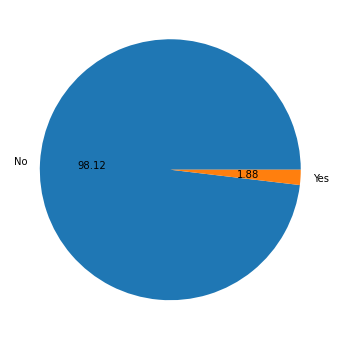

In [20]:
plt.figure(figsize = [10,6])
plt.pie(cancelled.Counts,labels = ['No','Yes'],autopct = '%0.2f');

> Observations: More than 90% of flight are not cancelled.

<p id='Q5'></p>

<a href='#top'>GoToTop</a>

### Question

#### 5. Which month has the highest number of flights

### Visualization

#### Getting data for Month from the database

In [28]:
month_flight = pd.read_sql('''SELECT DISTINCT(MONTH), COUNT(MONTH)/21 as Counts FROM "master.feather"
                        group by Month''',conn)

In [29]:
#Printing the data
month_flight

,Month,Counts
0,1,489166
1,2,449105
2,3,497525
3,4,480094
4,5,463055
5,6,458013
6,7,473524
7,8,477836
8,9,449287
9,10,485831


In [30]:
#Mapping each Month to their respective number, and creating a column for it.
month_flight['month'] = month_flight.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5: 'May',6:'Jun',7: 'Jul',8:'Aug',
                                 9:'Sep',10: 'Oct',11:'Nov',12:'Dec'})

In [31]:
#Dropping column Month
month_flight.drop('Month',axis = 1,inplace = True)

#### Let's define another barplot function  for this data,so that we can customize it better

In [32]:
def Barplot3(data,x,y,color = sns.color_palette()[0],title = '',xlabel = '',ylabel = '',
             yscale = 'linear',yticks_value = None,yticks_label = None):
    '''Plotting Barplot'''
    plt.figure(figsize = [10,6])
    sns.barplot(data = data,x = x,y = y,color = color);
    plt.title(title)
    plt.yscale(yscale);
    plt.yticks(yticks_value,yticks_label);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel)
    plt.show()

#### Using the newly created Barplot function for visualization 

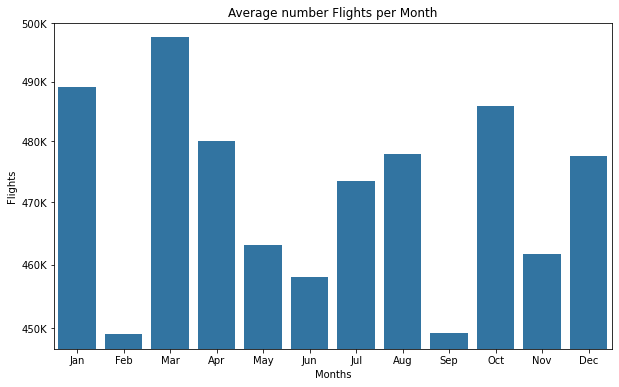

In [33]:
Barplot3(data = month_flight, x = 'month',y = 'Counts',title = 'Average number Flights per Month',xlabel = 'Months',
         yscale = 'log',yticks_value = [450000,460000,470000,480000,490000,500000],
        yticks_label = ['450K','460K','470K','480K','490K','500K'],ylabel = 'Flights')

> Observations: People tend to travel more in the month of March and travel less in February

<p id='Q6'></p>

<a href='#top'>GoToTop</a>

### Question

#### 6. Rate of diverted flights

### Visualization

#### Extracting the diverted column from the database the best way it'll suit our need for this analysis

In [4]:
diverted = pd.read_sql('''SELECT DISTINCT(DIVERTED), COUNT(DIVERTED) as Counts FROM "master.feather"
                group by DIVERTED''',conn)

In [5]:
#Creating a new column, so as to map 0 to No and 1 to Yes in the Diverted column
diverted['diverts'] = diverted.Diverted.map({0: 'No',1:'Yes'})
diverted.head()

,Diverted,Counts,diverts
0,0,118641865,No
1,1,272593,Yes


#### Using the barplot2() function to visualize the data.

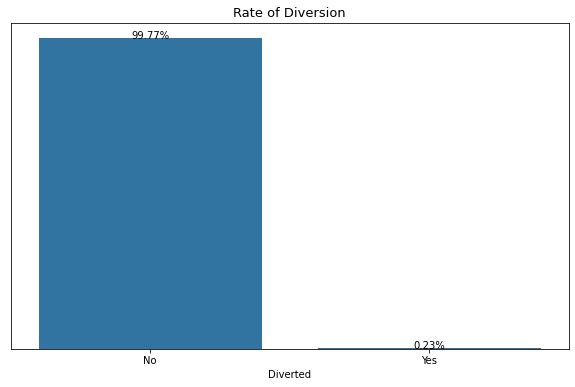

In [36]:
Barplot2(data = diverted,x = 'diverts',y = 'Counts',title = 'Rate of Diversion',bar_height = 1100000,xticks_value = [0,1],
        xticks_label = ['No','Yes'], xlabel = 'Diverted')

#### It can also be visualised using pie chart

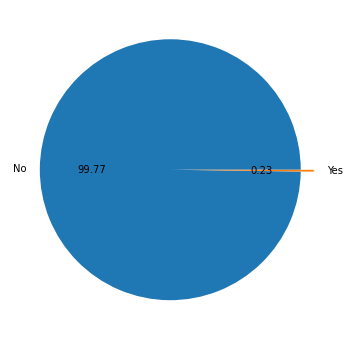

In [13]:
plt.figure(figsize = [10,6])
plt.pie(diverted.Counts,labels = ['No','Yes'],autopct = '%0.2f',explode = [0,0.1]);

> Observations: Only on rare circumstances will a flight be cancelled.

<p id='Q10'></p>

<a href='#top'>GoToTop</a>

### Question

#### 7. NASDELAY Distribution

### Visualization

#### Getting the data for NASDelay from the database, we'll be considering delays that are beyond actual scheduledtime

In [37]:
nasdelay = pd.read_sql('''SELECT NASDELAY from "master.feather"
                        where Nasdelay != "None" and Nasdelay > 0''',conn)

####  Creating a function for plot transformation.

In [38]:
def sqrttransform(x, inverse = False):
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2 

#### Creating histplot for the data so as to get its distribution.

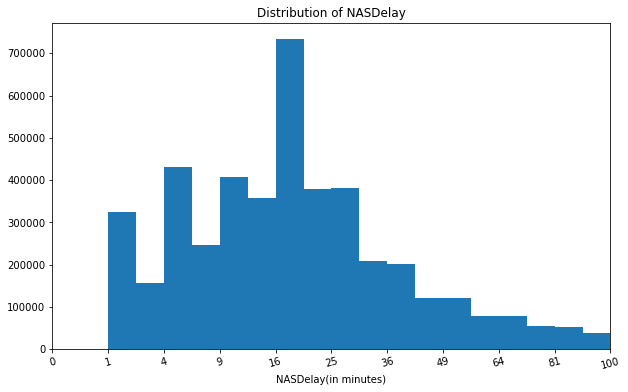

In [39]:
plt.figure(figsize = [10,6]);
#Setting bin edges.
bins = np.arange(0,sqrttransform(nasdelay['NASDelay'].max()+.5),.5)
#Creating an histplot
plt.hist(nasdelay['NASDelay'].apply(sqrttransform),bins = bins);
#Creating plot title.
plt.title('Distribution of NASDelay');
plt.xlabel('NASDelay(in minutes)')
tick_locs = np.arange(0,sqrttransform(nasdelay['NASDelay'].max())+1,1)
plt.xticks(tick_locs,sqrttransform(tick_locs,inverse = True).astype(int),rotation = 15);
plt.xlim(0,10);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the <code>Month</code>  performed a log transformation so as to give visualize the data better, the <code>NASDelay</code> distribution shows that the right skewed and from the distribution we're able to deduce that most delays are between 16 to 25 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While reading the <code>NASDelay</code> column, i select only minutes greater than zero, because i want to visualize delays that are significant.

## Bivariate Exploration

<p id='Q11'></p>

<a href='#top'>GoToTop</a>

### Question

#### 1. Is there any relationship between departure delay and arrival delay

### Visualization

In [4]:
#getting the data for both Arrdelay and DepDelay and excluding their null values 
arr_delay = pd.read_sql('''SELECT DepDelay,Arrdelay from "master.feather" where 
                            DepDelay != "None" and Arrdelay != "None"''',conn)

In [5]:
#getting the first five rows
arr_delay.head()

,DepDelay,ArrDelay
0,11.0,23.0
1,-1.0,14.0
2,11.0,29.0
3,-1.0,-2.0
4,19.0,33.0


In [6]:
#making a copy of the data
arr_delay_copy = arr_delay.copy()

In [7]:
#Dropping null values
arr_delay_copy = arr_delay_copy.dropna()

In [8]:
#Checking for null values
arr_delay_copy.isnull().sum()

DepDelay    0
ArrDelay    0
dtype: int64

#### Creating a function to check  for relationship between these two features

In [9]:
def scatter(data,x,y,title,x_label,y_label):
    plt.figure(figsize = [10,6]);
    '''Scatter Plot'''
    plt.scatter(data = data, x = x, y = y);
    plt.title(title);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.show();

#### Using created function to viusualize the data

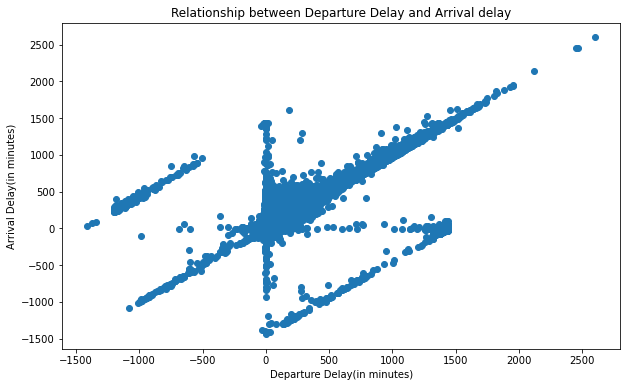

In [10]:
scatter(data = arr_delay_copy, x = 'DepDelay',y = 'ArrDelay',title = 'Relationship between Departure Delay and Arrival delay',
        x_label = 'Departure Delay(in minutes)',
        y_label = 'Arrival Delay(in minutes)');

>Observations: There is positive relationship between Departure delay and Arrival delay.

<p id='Q12'></p>

<a href='#top'>GoToTop</a>

### Question

#### 2. Is there any relationship between departure delay and weather delay

### Visualization

#### Loading column Departure and Weather delay from the database.

In [11]:
dep_weather = pd.read_sql('''SELECT DEPDELAY,WEATHERDELAY from "master.feather" 
                          where DEPDELAY != "None" and WEATHERDELAY!= "None"'''
                          ,conn)

#### Creating a copy of the data.

In [12]:
dep_weather_copy = dep_weather.copy() 

#### Creating a Regression plot function for the data.

In [13]:
def regplot(data,x,y,title,x_label,y_label,alpha = 0.2):
    sns.regplot(data = data, x = x, y = y,scatter_kws = {'alpha': alpha})
    plt.title(title);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.show();

#### Using the generation function to visualize the data

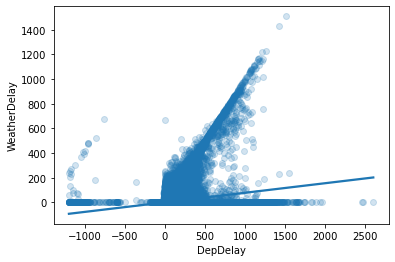

In [14]:
sns.regplot(data = dep_weather_copy, x = 'DepDelay', y = 'WeatherDelay',scatter_kws = {'alpha': 0.2});

<p id='Q13'></p>

<a href='#top'>GoToTop</a>

### Question

#### 3. Is there any relationship between LateAircraft delay and ArrivalDelay

### Visualization

In [15]:
#reading the data to pandas from the database.
aircraft_arr = pd.read_sql('''SELECT lateaircraftdelay,Arrdelay from "master.feather" 
                           where lateaircraftdelay != "None" and Arrdelay != "None"''',conn)

In [16]:
#checking for null values.
aircraft_arr.isnull().sum()

LateAircraftDelay    0
ArrDelay             0
dtype: int64

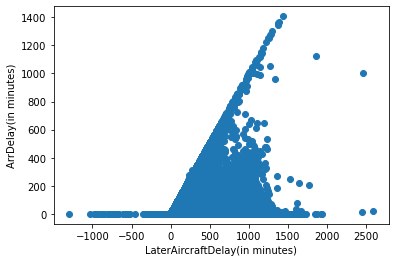

In [18]:
#plotting a scatter plot for visualization.
plt.scatter(data = aircraft_arr, y = 'LateAircraftDelay', x = 'ArrDelay');
plt.xlabel('LaterAircraftDelay(in minutes)');
plt.ylabel('ArrDelay(in minutes)');

> Observations: There is a linear positive relationship between LateAircraftDelay and ArrivalDelay.

<p id='Q14'></p>

<a href='#top'>GoToTop</a>

### Question

#### 4. Distribution of flight across engine type

### Visualization

In [22]:
#Merging the data from master dataframe and plane dataframe.
eng_aircr = pd.read_sql('''SELECT p.engine_type,m.Distance from "plane_data.feather" p
                        inner join "master.feather" m on m.tailnum = p.tailnum''',conn)

In [23]:
#making a copy of the dataframe.
eng_aircr_copy = eng_aircr.copy()

In [24]:
#dropping null values.
eng_aircr_copy = eng_aircr_copy.dropna()

In [25]:
#Dropping value with 'None' in the dataframe
eng_aircr_copy = eng_aircr_copy.query('engine_type != "None"')

In [26]:
#Checking for unique engine type.
eng_aircr_copy.engine_type.unique()

array(['Turbo-Fan', 'Turbo-Jet', 'Reciprocating', 'Turbo-Prop',
       'Turbo-Shaft', '4 Cycle'], dtype=object)

In [27]:
#printing the first five rows of the data.
eng_aircr_copy.head()

,engine_type,Distance
174502,Turbo-Fan,74.0
174503,Turbo-Fan,74.0
174504,Turbo-Fan,74.0
174505,Turbo-Fan,74.0
174506,Turbo-Fan,79.0


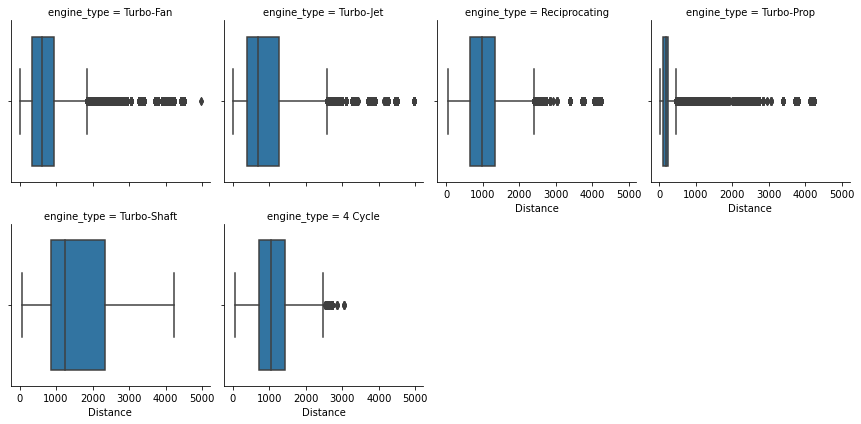

In [28]:
#Using a Facetgrid to check for the distribution of each engine type.
g = sns.FacetGrid(data = eng_aircr_copy, col = 'engine_type',col_wrap = 4,height = 3)
g.map(sns.boxplot,'Distance');

Observations: Alot of outliers found in the turbo-prob engine.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Looking at the boxplot well, we can see that the Turbo-prop engine is less likely to be used for a distance more than 500miles, while the Turbo-shaft is most likely to be used to for a farther distance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a strong positive relationshipm between AircraftDelay and ArrDelay.

## Multivariate Exploration

<p id='Q15'></p>

<a href='#top'>GoToTop</a>

### Question

#### 1. Relationship between delays

### Visualization

In [4]:
#Querying required data from the database.
delays = pd.read_sql('''SELECT lateaircraftdelay,Arrdelay,depdelay,CarrierDelay, WeatherDelay, 
                      Nasdelay, SecurityDelay from "master.feather" 
                      where lateaircraftdelay != "None" and Arrdelay != "None" 
                     and depdelay != "None" and CarrierDelay != "None" and 
                     weatherdelay != "None" and NasDelay != "None" and SecurityDelay != "None"''',conn)

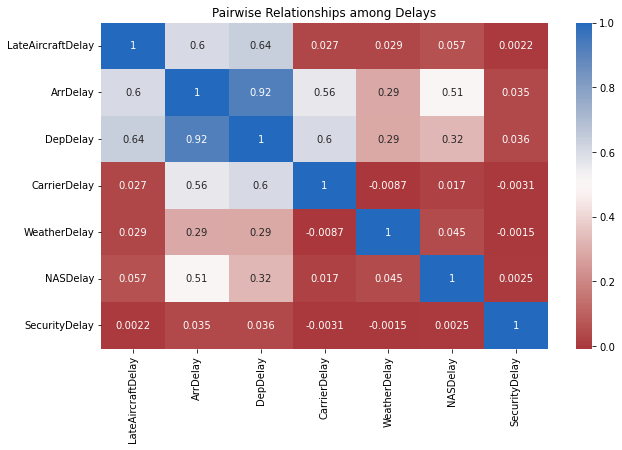

In [6]:
#Creating heatmap plot for the data.
plt.figure(figsize = [10,6]);
sns.heatmap(delays.corr(),annot = True,cmap = 'vlag_r');
plt.title('Pairwise Relationships among Delays');

### Let's create a pairplot to visualize the data.

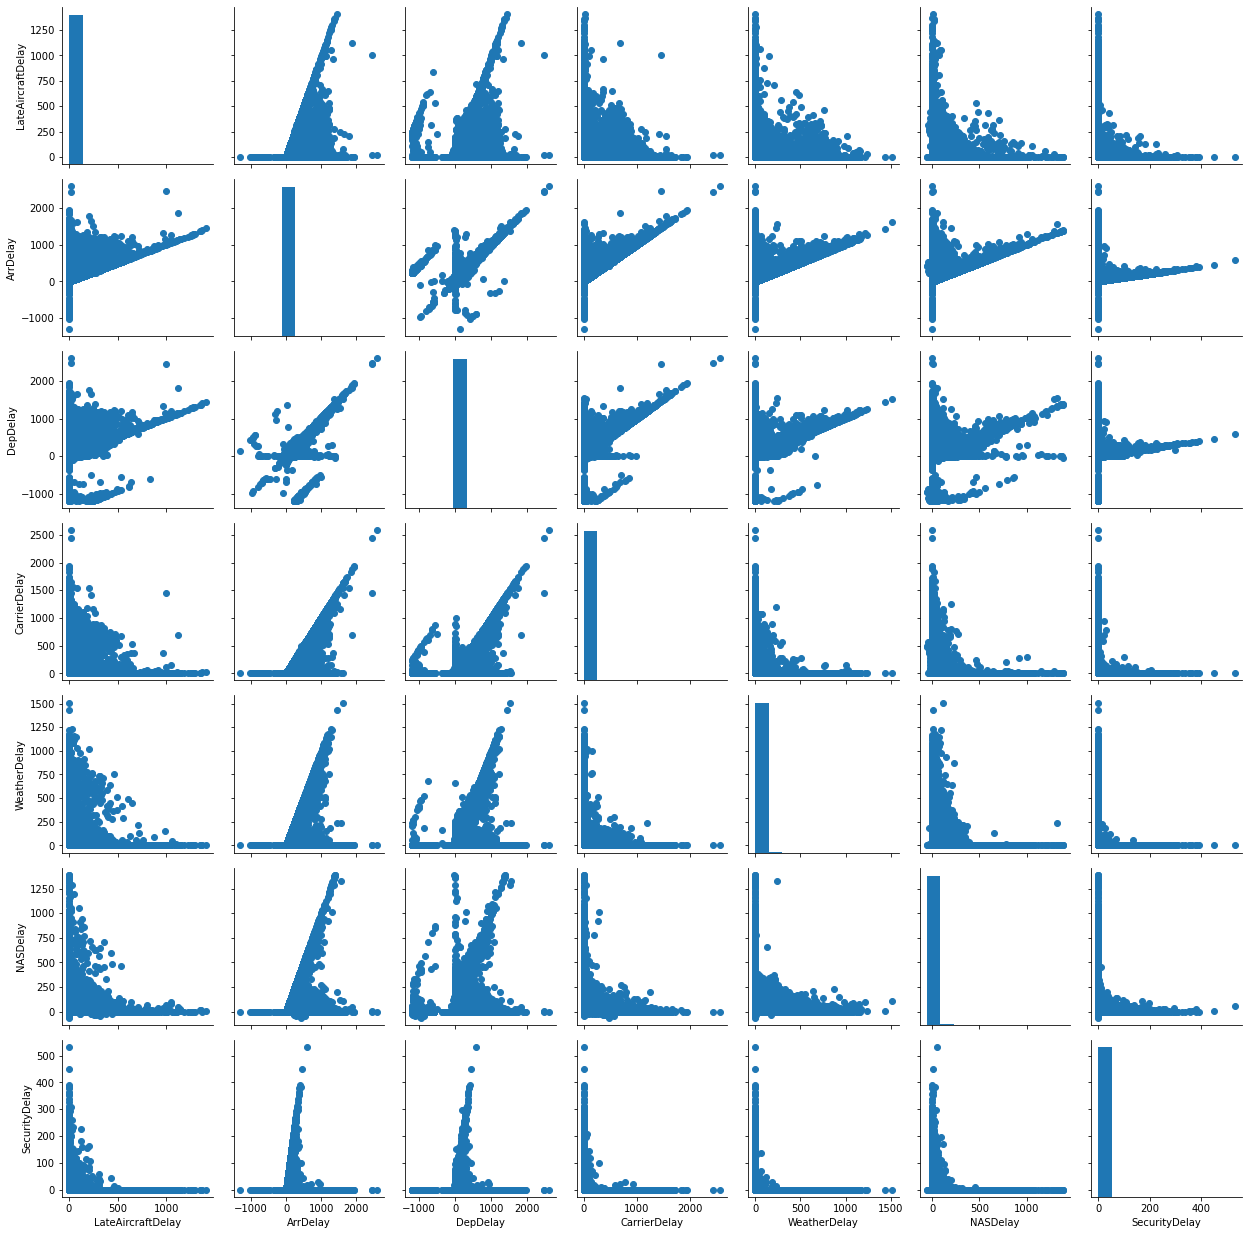

In [21]:
g = sns.PairGrid(data = delays,vars = ['LateAircraftDelay', 'ArrDelay', 'DepDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>We noticed that there is a strong positive relationship between <code> DepDelay</code> and <code> ArrDelay</code>,  also between <code>CarrierDelay</code> and <code> DepDelay</code>
### Were there any interesting or surprising interactions between features?

> Observing that there is no strong relationship between <code> WeatherDelay</code> and <code>DepDelay</code>, also <code> WeatherDelay</code> and <code>ArrDelay</code> is really surprising.

## Conclusions

> People travels on Sunday than in other days of the week, atleast in a day there are always more than 14000 flight. People tend to travel more during the month of March and then January than any other month of the year and people travel less in September and then February,In 2008, people travelled more than in any other year since 1987.

> Only on rare circumstance will a flight be cancelled, more than 98% of flight are not always cancelled. If flight is being cancelled. Approximately 43.78% of cancelled flight is caused by Carrier, 35.95% is due to Weather condition, 20.18% is caused by NAS, while 0.09% is due to security reason.

> Out of every 100 flights, 1 or no flight will be diverted. Also, if there is a delay in departure time, there will also be a delay in arrival time of flight. Late Arrival of Flight also has effect on the departure time and the arrival time of the flight.

> Also looking at the relationship between the engine_types and distance, we see that the turbo-shaft engine is most appropriate for travelling for both short and long distance.


In [14]:
#closing the database connection.
conn.close()